https://www.kaggle.com/code/jessemostipak/getting-started-tpus-cassava-leaf-disease/notebook
https://www.kaggle.com/learn/intro-to-deep-learning

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])


2022-04-14 13:39:29.790623: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


With the first argument, units, we define how many outputs we want. In this case we are just predicting 'calories', so we'll use units=1.

With the second argument, input_shape, we tell Keras the dimensions of the inputs. Setting input_shape=[3] ensures the model will accept three features as input ('sugars', 'fiber', and 'protein').

In [3]:
import pandas as pd

concrete = pd.read_csv('data/dl-course-data/concrete.csv')
concrete.head()


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
row, col = concrete.shape
input_shape = [col - 1]
input_shape

[8]

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=input_shape),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=1)
])

We can define the activation layer as below.

In [6]:
model = keras.Sequential([
    layers.Dense(units=512, input_shape=input_shape),
    layers.Activation('relu'),
    layers.Dense(units=512),
    layers.Activation('relu'),
    layers.Dense(units=512),
    layers.Activation('relu'),
    layers.Dense(units=1)
])

In [7]:
# Training with the wines dataset

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=[11]),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=1)
])
model.compile(
    optimizer='adam',
    loss='mae'
)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

wines = pd.read_csv('../deep_learning_tutorial/data/dl-course-data/red-wine.csv')
pre_processor = Pipeline([
    ('scaler', MinMaxScaler())
])
X = wines.drop('quality', axis=1).copy()
y = wines.quality.copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)

X_train = pre_processor.fit_transform(X_train)
X_test = pre_processor.transform(X_test)
y_train = pre_processor.fit_transform(y_train.values.reshape(-1,1))
y_test = pre_processor.transform(y_test.values.reshape(-1,1))

# # Create training and validation splits
# df_train = wines.sample(frac=0.7, random_state=0)
# df_valid = wines.drop(df_train.index)

# # Scale to [0, 1]
# max_ = df_train.max(axis=0)
# min_ = df_train.min(axis=0)
# df_train = (df_train - min_) / (max_ - min_)
# df_valid = (df_valid - min_) / (max_ - min_)

# # Split features and target
# X_train = df_train.drop('quality', axis=1)
# X_test = df_valid.drop('quality', axis=1)
# y_train = df_train['quality']
# y_test = df_valid['quality']

In [9]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10
0,0.400000,0.413223,0.051282,0.068493,0.188482,0.366197,0.296820,0.611601,0.254386,0.224242,0.178571
1,0.200000,0.363636,0.282051,0.061644,0.062827,0.197183,0.063604,0.316446,0.464912,0.296970,0.500000
2,0.672727,0.314050,0.756410,0.034247,0.061082,0.309859,0.127208,0.582232,0.043860,0.212121,0.375000
3,0.109091,0.140496,0.333333,0.054795,0.043630,0.028169,0.017668,0.104993,0.456140,0.127273,0.910714
4,0.181818,0.595041,0.038462,0.095890,0.036649,0.436620,0.148410,0.376652,0.570175,0.139394,0.696429
...,...,...,...,...,...,...,...,...,...,...,...
1114,0.209091,0.322314,0.294872,0.075342,0.059337,0.169014,0.056537,0.316446,0.464912,0.309091,0.500000
1115,0.190909,0.479339,0.102564,0.195205,0.050611,0.098592,0.035336,0.240088,0.491228,0.115152,0.750000
1116,0.290909,0.578512,0.371795,0.232877,0.078534,0.281690,0.204947,0.466226,0.254386,0.121212,0.178571
1117,0.227273,0.508264,0.205128,0.068493,0.108202,0.197183,0.250883,0.479442,0.350877,0.187879,0.160714


In [11]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=10
)

Epoch 1/10
5/5 [==============================] - 0s 31ms/step - loss: 0.2526 - val_loss: 0.1305
Epoch 2/10
5/5 [==============================] - 0s 10ms/step - loss: 0.1310 - val_loss: 0.1243
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 0.1184 - val_loss: 0.1188
Epoch 4/10
5/5 [==============================] - 0s 11ms/step - loss: 0.1114 - val_loss: 0.1126
Epoch 5/10
5/5 [==============================] - 0s 18ms/step - loss: 0.1054 - val_loss: 0.1104
Epoch 6/10
5/5 [==============================] - 0s 10ms/step - loss: 0.1033 - val_loss: 0.1091
Epoch 7/10
5/5 [==============================] - 0s 11ms/step - loss: 0.1030 - val_loss: 0.1071
Epoch 8/10
5/5 [==============================] - 0s 9ms/step - loss: 0.1007 - val_loss: 0.1052
Epoch 9/10
5/5 [==============================] - 0s 9ms/step - loss: 0.0997 - val_loss: 0.1046
Epoch 10/10
5/5 [==============================] - 0s 9ms/step - loss: 0.0991 - val_loss: 0.1038


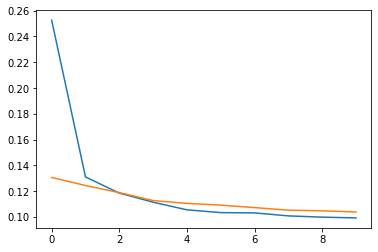

In [16]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();
history_df['val_loss'].plot();

In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
import numpy as np

fuel_econ = pd.read_csv('data/dl-course-data/fuel.csv')

X = fuel_econ.drop('FE', axis=1).copy()
y = fuel_econ.FE

preprocessor = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False), make_column_selector(dtype_include=object))
)

X = preprocessor.fit_transform(X)
y = np.log(y)

input_shape = [X.shape[1]]

In [22]:
X.shape

(1107, 50)

In [23]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [26]:
model.compile(
    optimizer='adam',
    loss='mae'
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

Epoch 1/128
3/3 [==============================] - 0s 58ms/step - loss: 0.1658 - val_loss: 0.0765
Epoch 2/128
3/3 [==============================] - 0s 10ms/step - loss: 0.1321 - val_loss: 0.0593
Epoch 3/128
3/3 [==============================] - 0s 11ms/step - loss: 0.0795 - val_loss: 0.0922
Epoch 4/128
3/3 [==============================] - 0s 11ms/step - loss: 0.0688 - val_loss: 0.0996
Epoch 5/128
3/3 [==============================] - 0s 11ms/step - loss: 0.0785 - val_loss: 0.0669
Epoch 6/128
3/3 [==============================] - 0s 11ms/step - loss: 0.0631 - val_loss: 0.0567
Epoch 7/128
3/3 [==============================] - 0s 11ms/step - loss: 0.0653 - val_loss: 0.0456
Epoch 8/128
3/3 [==============================] - 0s 11ms/step - loss: 0.0532 - val_loss: 0.0412
Epoch 9/128
3/3 [==============================] - 0s 27ms/step - loss: 0.0463 - val_loss: 0.0380
Epoch 10/128
3/3 [==============================] - 0s 12ms/step - loss: 0.0391 - val_loss: 0.0425
Epoch 11/128
3/3 [=

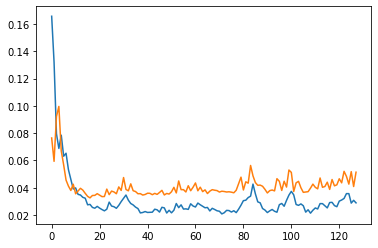

In [28]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=400,
    epochs=128
)

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();
history_df['val_loss'].plot();

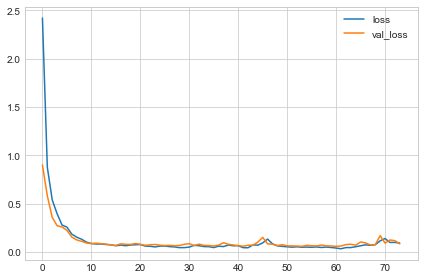

In [37]:
# Early Stopping 

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta = 0.001,
    patience = 20,
    restore_best_weights = True
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape = [X.shape[1]]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mae'
)

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],
    verbose=0
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();